TITANIC SURVIVAL PREDICTION

In [622]:
import pandas as pd
import numpy as np

Data Collection and Processing

In [623]:
titanic_df=pd.read_csv('Datasets/Titanic-Dataset.csv')

In [624]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [625]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [626]:
titanic_df.shape

(891, 12)

In [627]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [628]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling Missing Values

In [629]:
#Droping Cabin
titanic_df=titanic_df.drop(columns='Cabin',axis=1)

In [630]:
#Replacing missing values of Age with Mean of it
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].mean)

In [631]:
titanic_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [632]:
titanic_df['Embarked']=titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [633]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [634]:
print(titanic_df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


Visualization

In [635]:
titanic_df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [636]:
#No.of People Survived or not Survived
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

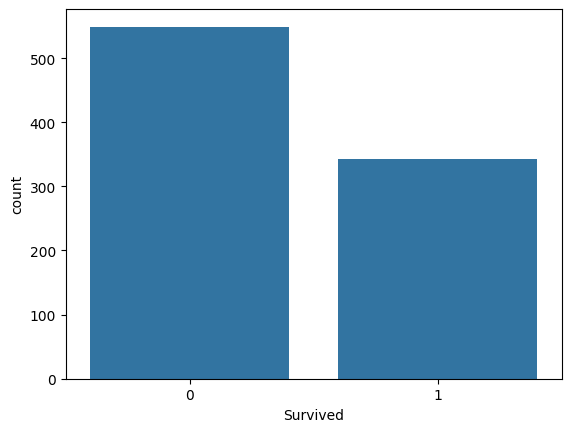

In [637]:
import seaborn as sns

sns.countplot(x='Survived', data=titanic_df)

In [638]:
#Total No.of Males and Females
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

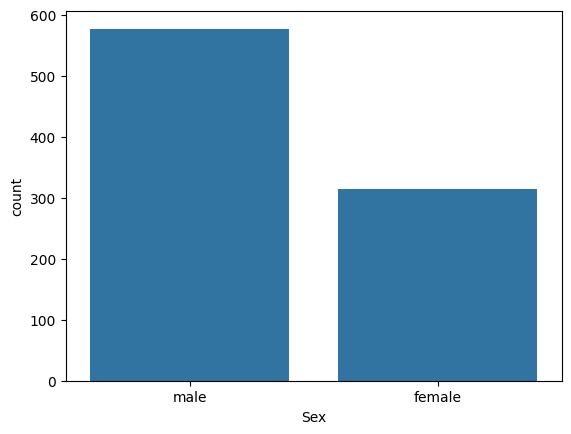

In [639]:
sns.countplot(x='Sex', data=titanic_df)

<Axes: xlabel='Sex', ylabel='count'>

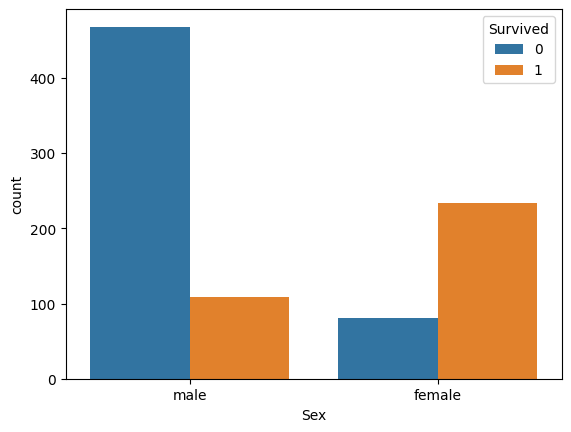

In [640]:
#Comparing Gender/Sex with Survived
sns.countplot(x='Sex',hue='Survived',data=titanic_df)

There are more Males compared to Females in the Titanic
But More Females Survived compared to Males 

<Axes: xlabel='Pclass', ylabel='count'>

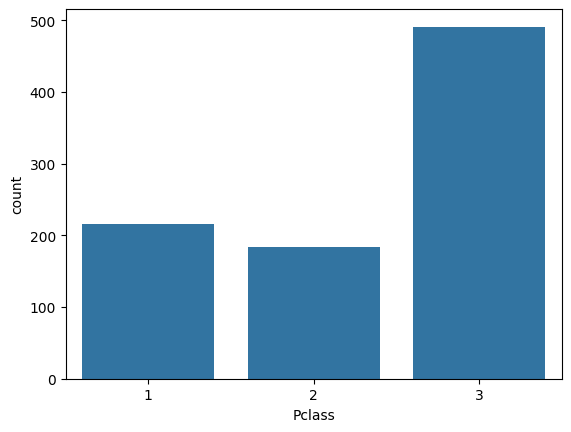

In [641]:
sns.countplot(x='Pclass', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

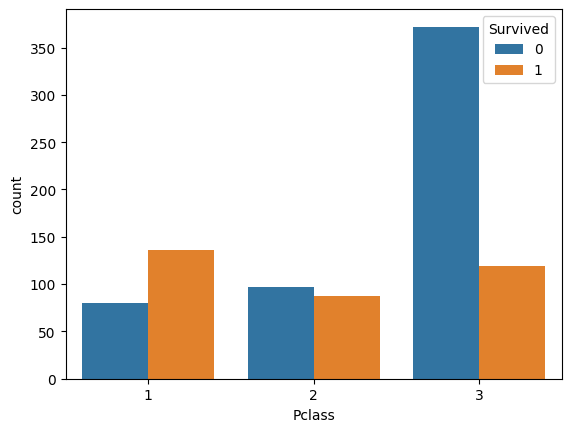

In [642]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_df)

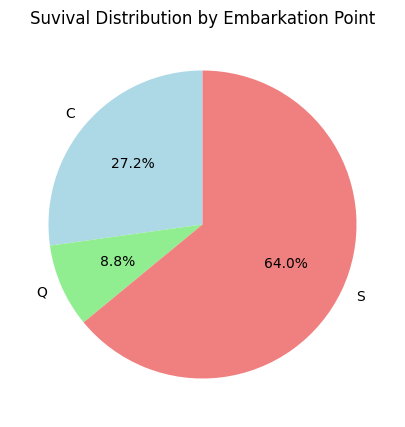

In [643]:
import matplotlib.pyplot as plt
embarked_counts=titanic_df.groupby('Embarked')['Survived'].sum()
plt.figure(figsize=(10,5))
plt.pie(embarked_counts,labels=embarked_counts.index,autopct='%1.1f%%',startangle=90,colors=['lightblue','lightgreen','lightcoral'])
plt.title("Suvival Distribution by Embarkation Point")
plt.show()

Encoding categorical values 
Sex
  Male-0
  Female-1
Embarked
  S-0
  C-1
  Q-2

In [644]:
erroneous_row_index = titanic_df[titanic_df['PassengerId'] == 889].index
titanic_df.drop(erroneous_row_index, inplace=True)

In [645]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [646]:
titanic_df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

C:\Users\karthick.S\AppData\Local\Temp\ipykernel_16144\976415273.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [647]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [648]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [649]:
X=titanic_df[['Pclass','Sex','Embarked']]
y=titanic_df['Survived']

In [650]:
X

,Pclass,Sex,Embarked
0,3,0,0
1,1,1,1
2,3,1,0
3,1,1,0
4,3,0,0
...,...,...,...
885,3,1,2
886,2,0,0
887,1,1,0
889,1,0,1


In [651]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 890, dtype: int64

Spliting the Dataset into Train and Test set

In [652]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [653]:
print(X_train.shape,X_test.shape)

(712, 3) (178, 3)


In [654]:
print(Y_train.shape,Y_test.shape)

(712,) (178,)


Model Training

In [655]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [656]:
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation
Accuracy Score

In [657]:
from sklearn.metrics import accuracy_score

In [658]:
X_train_pred=model.predict(X_train)
print(X_train_pred)

[1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0
 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 0 1 0 0 

In [659]:
training_pred_acc=accuracy_score(Y_train,X_train_pred)
print("Accuracy Score of Training Data: ",training_pred_acc)

Accuracy Score of Training Data:  0.7935393258426966


In [660]:
X_test_pred=model.predict(X_test)
print(X_test_pred)

[0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0]


In [661]:
testing_pred_acc=accuracy_score(Y_test,X_test_pred)
print("Accuracy Score of Training Data: ",testing_pred_acc)

Accuracy Score of Training Data:  0.7584269662921348


In [662]:
def titanic_survival_prediction():
    print("Please Enter the following details: ")

    Pclass=int(input("Pclass Enter(1,2, or 3): "))
    Sex=int(input("Enter Male-0,Female-1: "))
    Embarked=int(input("Enter Embarked (S:0,C:1,Q:2)"))

    user_data=pd.DataFrame([[Pclass,Sex,Embarked]],columns=['Pclass','Sex','Embarked'])
    pred=model.predict(user_data)

    if pred==1:
        print("You Survived!")
    else:
        print("Sorry..You did not Survived.")

In [663]:
titanic_survival_prediction()

Please Enter the following details: 
Sorry..You did not Survived.
